# Coleta de Dados no Twitter utilizando pacote Tweepy do Python e armazena em arquivo, no MongoDB e MySQL

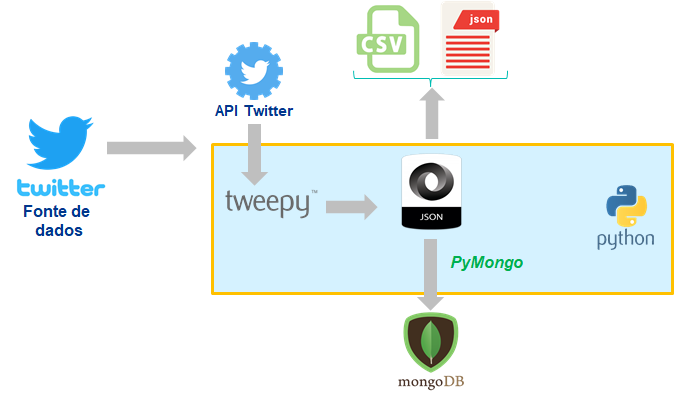


<b>Antes de utilizar qualquer pacote, é <font color='red'>SEMPRE necessário instalar</font> o(s) pacote(s) previamente. A instalação só é necessária uma única vez.</b>


+ Para instalar pelo Jupyter, utilize o comando abaixo:

    - *!pip install nome_do_pacote*

In [ ]:
#Install package
!pip install tweepy

**OBSERVAÇÃO:**
A documentação completa do pacote *tweepy* está disponível no link abaixo:
* http://docs.tweepy.org/en/v3.5.0/api.html

**<font color='red'>SEMPRE é necessário importar</font>**  o(s) pacote(s) que serão usados no seu script.

In [ ]:
#Import package

import tweepy


### Credenciais para utilização da API do Twitter

Para utilizar a API do twitter, é necessário ter uma conta no twitter, solicitar o acesso de desenvolvedor, criar sua aplicação, gerar suas credenciais.

In [ ]:
# Credenciais para utilização da API do Twitter

API_Key = ""
API_secret_key = ""

access_token = ""
access_token_secret = ""

Fazer a autenticação na API usando suas credenciais

In [ ]:
#Realizar autenticação no Twitter
auth = tweepy.OAuthHandler(API_Key, API_secret_key)
auth.set_access_token(access_token, access_token_secret)

# Construct the API instance
api = tweepy.API(auth)

No exemplo acima, criamos a variável api que é uma instância/token já autenticado no twitter. Neste caso, o token usará as configurações padrões para busca de tweets.

In [ ]:
# Post/create a tweet
api.update_status("Hello Tweepy!")

### Realizar a busca dos trends tweets.

In [ ]:
# Where On Earth ID for Brazil is 23424768.
BRAZIL_WOE_ID = 23424768

##### Trends em múltiplas localizações

In [ ]:
# Available Locations
available_loc = api.trends_available()

In [ ]:
#Print first vector element
available_loc[0]

##### Trends no Brasil

In [ ]:
brazil_trends = api.trends_place(BRAZIL_WOE_ID)

In [ ]:
#Print first vector element
brazil_trends[0]["trends"][0]

Os métodos <i>trends_available</i> e <i>trends_place</i> retorna um conjunto de objetos com informações dos tópicos no formato JSON.

Abaixo, exibir a informação <i>name</i> de cada objeto, que é o próprio título do tópico.

In [ ]:
#Print all vector elements, just column labeled name
for trend in brazil_trends[0]["trends"]:
    print (trend["name"])

### Realizar a busca por palavra chave.

In [ ]:
#Define keyword to search
keyword = ('vacina')

#keyword = ("covid-19  OR  covid  OR  coronavirus OR pandemic")

In [ ]:
# Define storage lists
tweets = [] #to storage just tweet text
info = [] #to storage full search JSON data

Nova autenticação para buscar mais tweets que a taxa limite da chamada.

<font color=red><b>onde:</b></font>
* <b><i>retry_count</i></b> - número padrão de tentativas para tentar quando ocorrer um erro
* <b><i>retry_delay</i></b> - número de segundos para aguardar entre tentativas
* <b><i>wait_on_rate_limit</i></b> - se deve ou não esperar automaticamente a reposição dos limites de taxa
* <b><i>wait_on_rate_limit_notify</i></b> - Imprima ou não uma notificação quando o Tweepy estiver aguardando a reposição dos limites de taxa

In [ ]:
# Construct the API instance

token  = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)


In [ ]:
for tweet in tweepy.Cursor(token.search,
                           q=keyword, tweet_mode='extended',
                           rpp=2000, result_type="mixed",
                           lang='pt', #serão solicitados apenas tweets em português
                           include_entities=True).items(2000):   
        
    if 'retweeted_status' in dir(tweet): # Check if Retweet
        # If status is a Retweet, status.full_text (tweet.full_text) could be truncated.
        # We should get retweeted_status.full_text
        aux=tweet.retweeted_status.full_text       
    else: # Not a Retweet
        aux=tweet.full_text
        
    newtweet = aux.replace("\n", " ")
   
    tweets.append(newtweet) #append tweet text to such list
    info.append(tweet) #append full tweet data to such list
    
    #open txt file in append mode and write
    file = open("tweets_Keyword_vacina.txt", "a", -1, "utf-8")    
    file.write(newtweet+'\n')
    file.close()


Para realizar a busca por palavra chave vamos utilizar a função abaixo:<br>
* <font color=green>API.search(q[, lang][, locale][, rpp][, page][, since_id][, geocode][, show_user])</font><br><br>
**onde os principais parâmetros que serão usados são:**

* <font color=blue>q</font> - a string de consulta de pesquisa
* <font color=blue>lang</font> - Restringe os tweets para o idioma especificado, fornecido por um código ISO 639-1.
  - lang=pt -> Português
  - lang=en -> Inglês
* <font color=blue>rpp</font> - O número de tweets a serem retornados por página, até no máximo 100.
* <font color=blue>page</font> - O número da página (começando em 1) a ser retornado, até um máximo de aproximadamente 1500 resultados (com base na página rpp).
* <font color=blue>since_id</font>  - Retorna apenas status com um ID maior que (ou seja, mais recente que) o ID especificado.
* <font color=blue>geocode</font>  - Retorna tweets de usuários localizados em um determinado raio da latitude / longitude especificada.
* <font color=blue>show_user</font>  - Quando verdadeiro, precede "<user>:" no início do tweet. O padrão é falso.
* <font color=blue>include_entities</font> - O nó de entidades não será incluído quando definido como false. O padrão é true. 
    - Detalhes sobre este nó, acesse https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/entities-object

* <font color=blue>tweet_mode</font> - Define qual o campo de texto que será recuperado, texto completo (280 caracteres) ou busca o texto do tweet truncado( 140 caracteres).
    - tweets = token.search(q=keyword,lang='pt') --> 140 caracteres 
    - tweets = token.search(q=keyword,tweet_mode='extended') -->280 caracteres

* <font color=blue>result_type</font> - Define o tipo do tweet a ser recuperado, onde pode ser o mais popular (result_type="popular"), mais recente (result_type="recent") ou uma combinação dos dois (result_type="mixed")    
    

In [ ]:
# Para verificar a quantidade de tweets coletado use a função "len()"

print("Total de tweets coletados %s." % (len(info)))

### <font color=blue>Armazenar o tweets coletados</font> 

##### <font color=red>Armazenar em arquivo JSON</font>

In [ ]:
#Install
#!pip install json

#Import
import json

In [ ]:
# writing a JSON file that has the available trends around the world

with open("tweets_vacina_pt.json","w") as filename: #open file in write mode


    for tweet in info: #para cada tweet no vetor de resultados tweets
        
        status = tweet
        
        #converte para string        
        json_str = json.dumps(status._json)
        
        #deserializa a string para um objeto python do tipo dict        
        parsed = json.loads(json_str)
        
        #grava o tweet deserializado no arquivo
        filename.write(json.dumps(parsed, indent=4))

    

##### <font color=red>Armazenar em arquivo CSV</font>

In [ ]:
#Install
#!pip install pandas
#!pip install numpy

#Import
import pandas as pd
import numpy as np

Para mais detalhes sobre o pacote **Pandas** acesse:
* https://pandas.pydata.org/
* https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1

Para mais detalhes sobre o pacote **Numpy** acesse:
* https://numpy.org/
* https://medium.com/ensina-ai/entendendo-a-biblioteca-numpy-4858fde63355

In [ ]:
#Define dataframe to store tweet data

tweets_df = pd.DataFrame(tweets, columns=['Tweets']) #Store tweet text from tweets list

tweets_df['len']  = np.array([len(tweet) for tweet in tweets])  #Store tweet text size from tweets list

#Store some column from info list
tweets_df['ID']   = np.array([tweet.id for tweet in info])
tweets_df['USER']   = np.array([tweet.user.screen_name for tweet in info])
tweets_df['userName'] = np.array([tweet.user.name for tweet in info])
tweets_df['User Location']    = np.array([tweet.user.location for tweet in info])
tweets_df['Language'] = np.array([tweet.user.lang for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes']  = np.array([tweet.favorite_count for tweet in info])
tweets_df['Retweets']    = np.array([tweet.retweet_count for tweet in info])

#Write csv file with daataframe data
tweets_df.to_csv("tweets_Keyword_vacina.csv")

In [ ]:
#Print first 3 rows of dataframe
tweets_df.head(3)

In [ ]:
#Podemos imprimir o nome do usuário (screen_name) e o texto do tweet
tweet = info[0]

print("Usuário: %s "% {tweet.user.screen_name})
#print("  Tweet: %s"  % {tweet.text})
print("  Tweet: %s"  % {tweet.full_text}) #No caso da busca em tweet_mode='extended'


#### <font color=red>Identificar Top Tweets coletados</font>

In [ ]:
# Tweets com maior número de LIKES
likes_max = np.max(tweets_df['Likes']) #Função max do numpy identifica o valor máximo

likes = tweets_df[tweets_df.Likes == likes_max].index[0] #pega o primeiro tweet com valor máximo de curtidas

print("O tweet com mais curtidas (likes) é: \n{}".format(tweets_df['Tweets'][likes]))
print("Número de curtidas: {}".format(likes_max))

In [ ]:
retweet_max  = np.max(tweets_df['Retweets']) #retorna o valor máximo

retweet  = tweets_df[tweets_df.Retweets == retweet_max].index[0] #pega o primeiro tweet com valor máximo de Retweets

print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][retweet]))
print("Número de retweets: {}".format(retweet_max))

##### <font color=red>Armazenar no MongoDB</font>

In [ ]:
#Install
#!pip install pymongo

#Import pymongo

import pymongo

In [ ]:
#Conexão ao banco de dados
con = pymongo.MongoClient('localhost', 27017)

#seleciona o banco de dados
db = con.twitterdb

In [ ]:
#seleciona a coleção para armazenar os tweets
collection = db.tweets_vacina

In [ ]:
#lista a quantidade de tweets existentes na coleção
db.tweets_vacina.count_documents({})

In [ ]:
i = 0
#para cada tweet no vetor de resultados tweets
for tweet in info:
    db.tweets_vacina.insert_one(tweet._json)
    i=i+1
    #print("Tweet inserido com sucesso !!")

In [ ]:
#lista a quantidade de tweets inseridos
print("Quantidade de tweets inseridos: %s" % i)

In [ ]:
#lista a quantidade de tweets existentes na coleção
db.tweets_keywords.count_documents({})

##### <font color=red>Armazenar no MySQL</font>

In [ ]:
#importar pacote
import mysql.connector

Conectar ao MySQL Server selecionand um banco de dados específico

In [ ]:
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    password='igti',
    database='tweets'
)

mycursor = mydb.cursor()

In [ ]:
for user in tweets_df.USER:
    # Inserir dados em uma tabela
    query = "INSERT INTO usuarios (user) VALUES ("+'"'+user+'"'+")"
    #print(query)
    mycursor.execute(query)

In [ ]:
#Consultar a tabela
mycursor.execute("SELECT * FROM usuarios")

myresult = mycursor.fetchall() #todos os registros

for mydata in myresult:
    print(mydata)

FIM!